src_path in sys.path: c:\Users\fikre\Change-Point-Analysis\src
Files in src: ['data_loader.py', 'event_data.py', 'time_series_analysis.py', 'utils.py', '__init__.py', '__pycache__']


c:\Users\fikre\Change-Point-Analysis\src\data_loader.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')


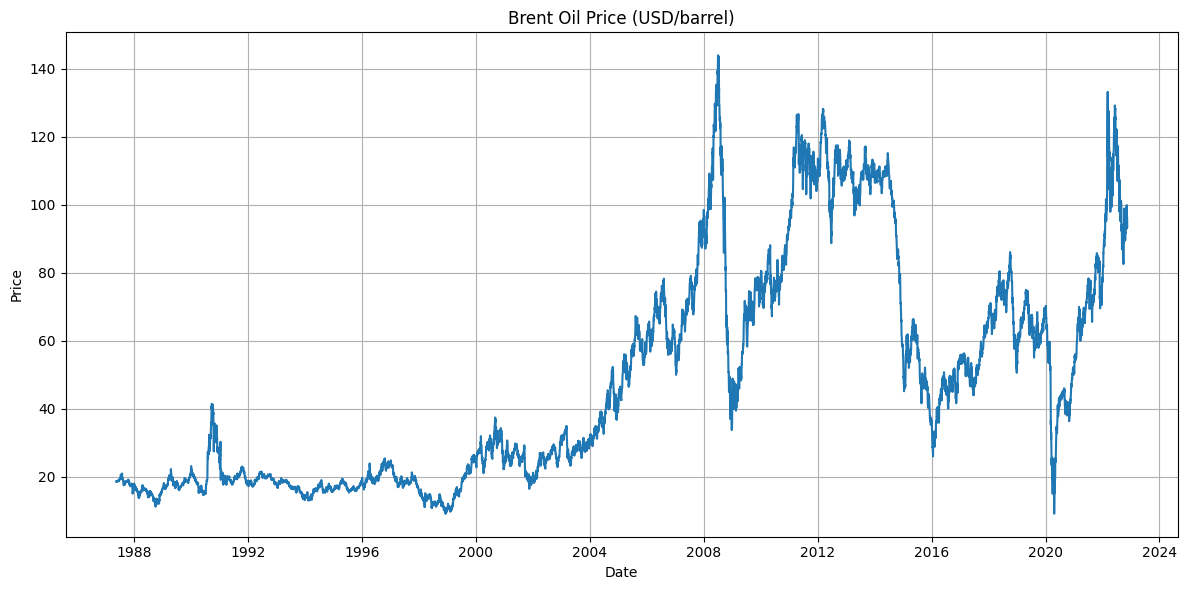

ADF Test: {'ADF Statistic': np.float64(-1.993856011392467), 'p-value': np.float64(0.2892735048934032)}
KPSS Test: {'KPSS Statistic': np.float64(9.558800416712563), 'p-value': np.float64(0.01)}
ASSUMPTIONS & LIMITATIONS
- Structural breaks can be identified, but exact causes must be interpreted cautiously.
- Correlation in time does not imply causation.
- Some price shifts may align with events by chance.
- Some events may not yield immediate price effects.


c:\Users\fikre\Change-Point-Analysis\src\time_series_analysis.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series, regression='c', nlags="auto")


In [16]:
import sys
import os
import importlib

# Add the src directory itself to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print("src_path in sys.path:", src_path)
print("Files in src:", os.listdir(src_path))

import data_loader
importlib.reload(data_loader)
from data_loader import load_oil_data

import time_series_analysis
importlib.reload(time_series_analysis)
from time_series_analysis import plot_price_series, adf_test, kpss_test

import utils
importlib.reload(utils)
from utils import print_assumptions

df = load_oil_data("../data/BrentOilPrices.csv")
plot_price_series(df)

# Stationarity Tests
print("ADF Test:", adf_test(df['Price']))
print("KPSS Test:", kpss_test(df['Price']))

# Discuss findings
print_assumptions()